# Conversion Rate
# Kaggle-like Challenge 
On vous propose ici de tester tout ce que vous avez appris sur le machine learning supervisé, dans le but de faire un modèle de prédiction sur des données fournies, à la manière des compétitions Kaggle.

**Déroulement d'un challenge Kaggle**
- Kaggle vous envoie toujours deux datasets :
  - un fichier data_train.csv qui contient des données correspondant aux variables X, et au label Y à prédire. Utilisez ce fichier pour entraîner vos modèles comme d'habitude.
  - un fichier data_test.csv, qui contient les données X au même format que dans data_train.csv, mais cette fois les labels sont cachés. Votre but est de faire des prédictions sur ces données et de renvoyer ces prédictions à Kaggle, pour qu'ils évaluent votre modèle de manière indépendante
- Kaggle compare vos prédictions aux vrais labels et propose un leaderboard (équipes classées en fonction de leur score)
- Kaggle vous annonce à l'avance quelle métrique va être utilisée pour évaluer les modèles : veillez à utiliser la même métrique pour évaluer les performances de vos modèles

**Prédiction de conversion**

Optimiser des taux de conversion est une des tâches les plus importantes d'un data scientist.

C'est pourquoi, nous allons construire un modèle qui va prédire le taux de conversion de clients sur un site web, en fonction de différentes variables explicatives et faire des recommandations à notre équipe marketing pour pouvoir augmenter notre revenu. Les modèles seront évalués à l'aide du f1-score.



# Importation des librairies et chargement du dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Uploading datasets

In [ ]:
from google.colab import files
files.upload()

In [ ]:
# Import dataset
print("Loading dataset...")
data = pd.read_csv("conversion_data_train.csv")
print("...Done.")
print()

Loading dataset...
...Done.



# Basic stats

In [ ]:
desc = data.describe(include='all')
display(desc)
print(data.shape)

,country,age,new_user,source,total_pages_visited,converted
count,284580,284580.000000,284580.000000,284580,284580.000000,284580.000000
unique,4,NaN,NaN,3,NaN,NaN
top,US,NaN,NaN,Seo,NaN,NaN
freq,160124,NaN,NaN,139477,NaN,NaN
mean,NaN,30.564203,0.685452,NaN,4.873252,0.032258
std,NaN,8.266789,0.464336,NaN,3.341995,0.176685
min,NaN,17.000000,0.000000,NaN,1.000000,0.000000
25%,NaN,24.000000,0.000000,NaN,2.000000,0.000000
50%,NaN,30.000000,1.000000,NaN,4.000000,0.000000
75%,NaN,36.000000,1.000000,NaN,7.000000,0.000000


(284580, 6)


###Répartition des variables catégorielles du dataset

In [ ]:
round(data.country.value_counts(normalize=True).mul(100),2)

US         56.27
China      24.29
UK         15.34
Germany     4.11
Name: country, dtype: float64

- Répartition des utilisateurs en fonctions des pays d'origines
- **La majeure partie des utilisateurs provient des USA.**

In [ ]:
round(data.new_user.value_counts(normalize=True).mul(100), 2)

1    68.55
0    31.45
Name: new_user, dtype: float64

- Environ 2/3 des utilisateurs sont nouvellement inscrits

In [ ]:
round(data.source.value_counts(normalize=True).mul(100),2)

Seo       49.01
Ads       28.12
Direct    22.87
Name: source, dtype: float64

- La source de traffic **Seo** semble prédominante chez les utilisateurs

In [ ]:
round(data.groupby("converted")["total_pages_visited"].value_counts(normalize = True).mul(100),2)

converted  total_pages_visited
0          2                      14.36
           3                      14.33
           4                      13.39
           1                      13.30
           5                      11.84
           6                       9.84
           7                       7.62
           8                       5.64
           9                       3.85
           10                      2.49
           11                      1.55
           12                      0.89
           13                      0.47
           14                      0.24
           15                      0.11
           16                      0.05
           17                      0.02
           18                      0.01
           19                      0.00
           20                      0.00
1          14                     10.32
           13                      9.74
           15                      9.64
           16                      9.43
         

In [ ]:
round(data.converted.value_counts(normalize=True).mul(100),2)

0    96.77
1     3.23
Name: converted, dtype: float64

- Nous avons un dataset déséquilibré avec un faible taux de conversion.

---

# Visualisation exploratoire des variables 

###Age

In [ ]:
mu = data['age'].mean()
std = data['age'].std()
min = round((mu - 2*std))
max = round((mu + 2*std))
print("âge minimum à 2 écart type de la moyenne:", min, "\n"  "âge maximum à 2 écart type de la moyenne:",max)

âge minimum à 2 écart type de la moyenne: 14 
âge maximum à 2 écart type de la moyenne: 47


In [ ]:
print("l'âge moyen des utilisateurs : {}".format(round(data['age'].mean())))
print("l'écart type : {}".format(round(data['age'].std())))

l'âge moyen des utilisateurs : 31
l'écart type : 8


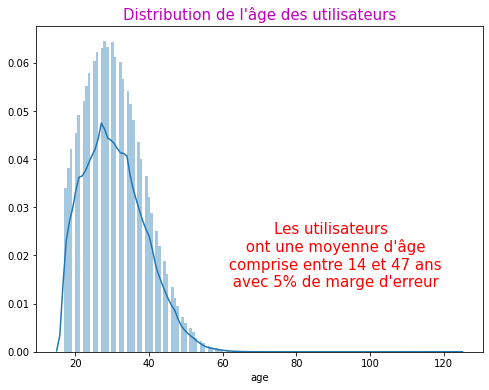

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(data.age, ax=ax,norm_hist=True, bins=150)
plt.title("Distribution de l'âge des utilisateurs", fontsize=15, color='m')
plt.text(90, 0.02, "Les utilisateurs \n ont une moyenne d'âge\n comprise entre 14 et 47 ans\n avec 5% de marge d'erreur", 
         horizontalalignment='center',verticalalignment='center',fontsize=15, color='r')
plt.show()

###Converted

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


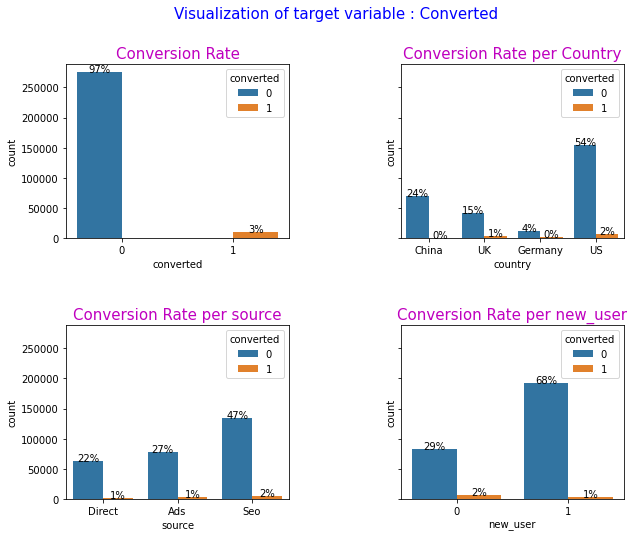

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(10,8), constrained_layout=False, sharey=True, )
fig.subplots_adjust(hspace=0.5, wspace=0.5)
fig.suptitle("Visualization of target variable : Converted", fontsize=15, color='b')

sns.countplot(data =data, x ="converted", hue="converted", ax = ax[0, 0])
ax[0,0].set_title("Conversion Rate",fontsize=15, color='m')

sns.countplot(data =data, x ="country", hue="converted", ax = ax[0, 1])
ax[0,1].set_title("Conversion Rate per Country",fontsize=15, color='m')

sns.countplot(data =data, x ="source",  hue="converted", ax = ax[1, 0])
ax[1,0].set_title("Conversion Rate per source",fontsize=15, color='m')

sns.countplot(data =data, x ="new_user",  hue="converted", ax = ax[1, 1])
ax[1,1].set_title("Conversion Rate per new_user", fontsize=15, color='m')

for i in range(2):
    for j in range(2):
        for p in ax[i, j].patches:
          total = float(len(data))
          height = p.get_height()
          ax[i,j].text(p.get_x()+p.get_width()/2.,
          height + 3, '{0:.0%}'.format(height/total), ha="center")
plt.show()

- Le taux de conversion est très faible.
- Les USA a le plus grand nombre d'utilisateurs et de taux de conversion
- La source **Seo** est la plus performante en matière de génération de traffic 

###Converted according to the number of total pages visited per user

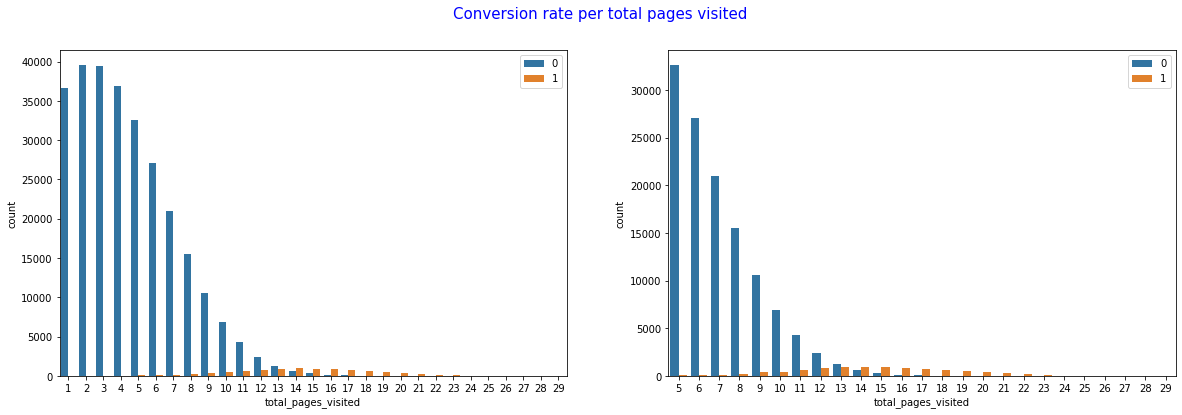

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(20,6), constrained_layout=False)
sns.countplot(data = data, x = "total_pages_visited", hue='converted', ax=ax[0])
fig.suptitle('Conversion rate per total pages visited', fontsize=15, color='b')
ax[0].legend(loc='upper right', bbox_to_anchor=(1, 1))
sns.countplot(data = data[data['total_pages_visited']>=5], x = "total_pages_visited", hue='converted', ax=ax[1])
ax[1].legend(loc='upper right', bbox_to_anchor=(1, 1))
plt.show()

- Les utilisateurs convertis ont régardé un **nombre de page supérieur ou égale 5.**

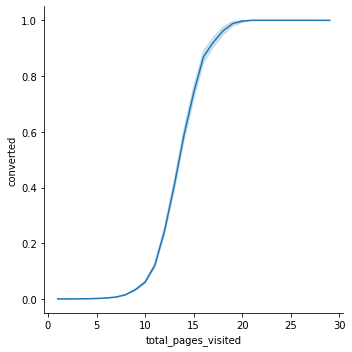

In [ ]:
sns.relplot(data = data, y ="converted", x = "total_pages_visited", kind = 'line')
plt.show()

- La probabilité de conversion d'un utilisateur s'accroit rapidement à partir de 10 pages consultées jusqu'à atteindre un plateau à 20.

### Country Variable 

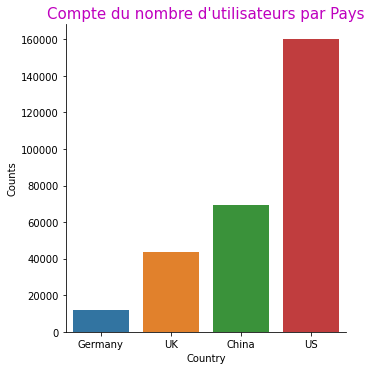

In [ ]:
# Visualisation de country
country = data.country.value_counts()
df_country = pd.DataFrame({"Country": country.index, "Counts":country.values}).sort_values(by ="Counts", ascending=True)
sns.catplot(data = df_country, x = "Country", y = "Counts", kind ="bar")
plt.title("Compte du nombre d'utilisateurs par Pays", fontsize=15, color='m')
plt.show()

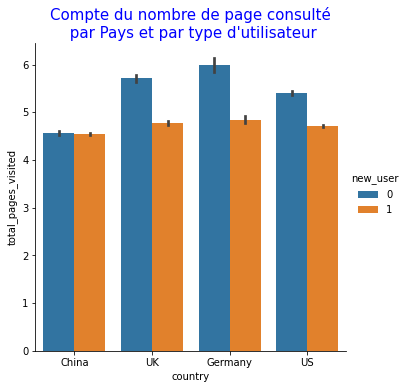

In [ ]:
sns.catplot(data = data, x = "country", y = "total_pages_visited", kind ="bar", hue = "new_user")
plt.title("Compte du nombre de page consulté\n par Pays et par type d'utilisateur", fontsize=15, color='b')
plt.show()

## Visualisation des variables  avec matplotlib

### Creating new datasets for plotting

In [ ]:
converted_count = pd.DataFrame(data.converted.value_counts(), index = data.converted.unique())
converted_count.index = ["No","Yes"]
converted_count

,converted
No,275400
Yes,9180


In [ ]:
country_count = pd.DataFrame({"Country":data.country.value_counts().values}, index =[i for i in data.country.value_counts().index])
country_count

,Country
US,160124
China,69122
UK,43641
Germany,11693


- **Focus on user converted** 

In [ ]:
converted_yes_count = data[data["converted"]==1]
print("Total Count of customers converted : ",data.converted.value_counts().values[1])
converted_yes_country_count = pd.DataFrame({"Country":converted_yes_count.country.value_counts().values}, index =[i for i in converted_yes_count.country.value_counts().index])
converted_yes_country_count

Total Count of customers converted :  9180


,Country
US,6070
UK,2291
Germany,730
China,89


### Plotting

In [ ]:
# Remove warnings messages
import warnings
warnings.filterwarnings('ignore')

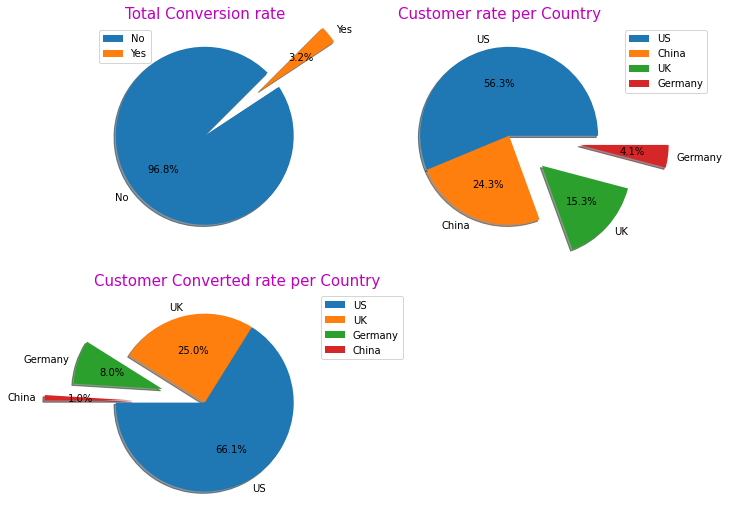

In [ ]:
# Visualisation de la variable cible
plt.figure(figsize=(10,9), constrained_layout=False)
explode1 = [0, 0.8]
explode2 = [0, 0, 0.5, 0.8]

plt.subplot(221)
plt.pie(converted_count, explode1, autopct='%1.1f%%',shadow=True, startangle=45, labels = converted_count.index) 
plt.legend(converted_count.index,loc='upper left', bbox_to_anchor=(0,1))
plt.title("Total Conversion rate", fontsize=15, color='m')


plt.subplot(222)
plt.pie(country_count, explode2, autopct='%1.1f%%',shadow=True, startangle=0, labels = country_count.index) 
plt.legend(country_count.index, loc='upper left', bbox_to_anchor=(1,1))
plt.title("Customer rate per Country", loc = "left" , fontsize=15, color='m')


plt.subplot(223)
plt.pie(converted_yes_country_count, explode2, autopct='%1.1f%%',shadow=True, startangle=180, labels = converted_yes_country_count.index) 
plt.legend(converted_yes_country_count.index, loc='upper left', bbox_to_anchor=(1,1))
plt.title("Customer Converted rate per Country", loc = "left", fontsize=15, color='m')

plt.show()

### Distribution des âges

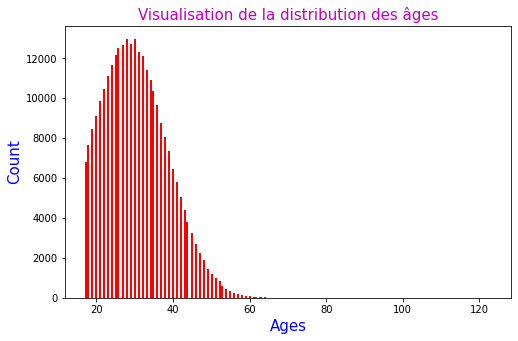

In [ ]:
# Visualisation de la distribution des âges
plt.figure(figsize=(8,5))   
plt.hist(data.age, 200, facecolor='r', density=False )
plt.title("Visualisation de la distribution des âges", fontsize = 15, color ='m')
plt.xlabel("Ages", fontsize = 15, color ='b')
plt.ylabel("Count", fontsize = 15, color ='b')
plt.show()

# Check correlations

In [ ]:
corr = data.corr()
#corr = corr.converted.sort_values(ascending = False)
#corr = abs(corr.converted.sort_values(ascending = False))
corr

,age,new_user,total_pages_visited,converted
age,1.000000,0.011676,-0.045365,-0.088265
new_user,0.011676,1.000000,-0.082986,-0.152115
total_pages_visited,-0.045365,-0.082986,1.000000,0.529192
converted,-0.088265,-0.152115,0.529192,1.000000


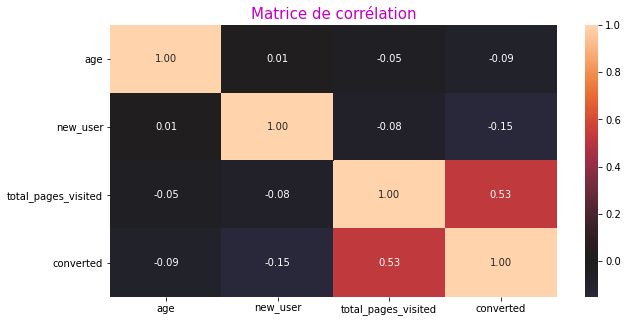

In [ ]:
# Set up the matplotlib figure & Compute the correlation matrix
f, ax = plt.subplots(figsize=(10, 5))
# Draw the heatmap
sns.heatmap(corr,  center=0, annot = True,fmt='.2f', ax = ax)
#botom, top = ax.get_ylim()
#ax.set_ylim(botom +0.5, top -0.5)
plt.title("Matrice de corrélation", fontsize=15, color='m')
plt.show()

- Le nombre de page visité est la variable explicative la plus corelée à la variable cible. 
- Par conséquent elle serait un bon prédicteur dans la conversion des utilisateurs

---

# Choice of variables to include in the model, and creating train and test datasets

- Variables cible : Y = 'converted'
- Variables explicatives : 'country', 'age', 'new_user', 'source', 'total_pages_visited', 
- Nombre d'exemples : 316200
- Imputation de valeurs manquantes : None
- Normalisation des variables quantitatives: 'age', 'new_user', 'total_pages_visited'
- Encodage des variables catégorielles : 'country', 'source'
- Encodage des labels : None

### Separating target variable Y from features X

In [ ]:
# Separate target variable Y from features X
print("Separating labels from features...")
features_list = ['country', 'age', 'new_user', 'source', 'total_pages_visited']
target_variable = "converted"
categorical_indices = [0,3]
numeric_indices = [1,2,4]


X = data.loc[:,features_list]
y = data.loc[:,target_variable]

print("...Done.")
print()

print('y : ')
print(y.head())
print()
print('X :')
print(X.head())

Separating labels from features...
...Done.

y : 
0    0
1    0
2    1
3    0
4    0
Name: converted, dtype: int64

X :
   country  age  new_user  source  total_pages_visited
0    China   22         1  Direct                    2
1       UK   21         1     Ads                    3
2  Germany   20         0     Seo                   14
3       US   23         1     Seo                    3
4       US   28         1  Direct                    3


### Train test split

In [ ]:
# Divide dataset Train set & Test set 
from sklearn.model_selection import train_test_split
print("Dividing into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state=42, stratify = y)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



### Converting pandas DataFrames into numpy arrays before using machine learning with scikit-learn library

In [ ]:
print("Convert pandas DataFrames to numpy arrays...")
X_train = X_train.values
X_test = X_test.values
y_train = y_train.tolist()
y_test = y_test.tolist()
print("...Done")

print(X_train[0:5,:])
print(X_test[0:2,:])
print()
print(y_train[0:5])
print(y_test[0:2])

Convert pandas DataFrames to numpy arrays...
...Done
[['US' 21 1 'Seo' 6]
 ['US' 35 1 'Seo' 4]
 ['US' 39 1 'Ads' 4]
 ['US' 43 1 'Seo' 4]
 ['China' 30 1 'Ads' 1]]
[['US' 31 1 'Ads' 2]
 ['US' 18 1 'Seo' 2]]

[0, 0, 0, 0, 0]
[0, 0]


# Training pipeline

In [ ]:
# Encoding categorical features and standardizing numerical features
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
print("Encoding categorical features and standardizing numerical features...")
print()
print(X_train[0:5,:])

# Normalization
numeric_transformer = StandardScaler()

# OHE / dummyfication
categorical_transformer = OneHotEncoder(drop='first')

featureencoder = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_indices),    
        ('num', numeric_transformer, numeric_indices)
        ]
    )

X_train = featureencoder.fit_transform(X_train)
print("...Done")
print(X_train[0:5,:])

Encoding categorical features and standardizing numerical features...

[['US' 21 1 'Seo' 6]
 ['US' 35 1 'Seo' 4]
 ['US' 39 1 'Ads' 4]
 ['US' 43 1 'Seo' 4]
 ['China' 30 1 'Ads' 1]]
...Done
[[ 0.          0.          1.          0.          1.         -1.15588691
   0.67657298  0.33785797]
 [ 0.          0.          1.          0.          1.          0.5345819
   0.67657298 -0.261071  ]
 [ 0.          0.          1.          0.          0.          1.017573
   0.67657298 -0.261071  ]
 [ 0.          0.          1.          0.          1.          1.50056409
   0.67657298 -0.261071  ]
 [ 0.          0.          0.          0.          0.         -0.06915696
   0.67657298 -1.15946446]]


### Model Training

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
print("Train model...")
classifier = LogisticRegressionCV(class_weight={0:0.50,1:0.8}, cv=10) # regularized logit with regularization strength chosen by cross-val
%time classifier.fit(X_train, y_train)
print("...Done.")

Train model...
CPU times: user 42.6 s, sys: 25.2 s, total: 1min 7s
Wall time: 34.4 s
...Done.


### Prediction of train set

In [ ]:
print("Predictions on training set...")
y_train_pred = classifier.predict(X_train)
print("...Done.")
print(y_train_pred)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]



# Test pipeline

In [ ]:
# Encoding categorical features and standardizing numerical features
print("Encoding categorical features and standardizing numerical features...")
print()
X_test = featureencoder.transform(X_test)
print("...Done")
print(X_test[0:5,:])

Encoding categorical features and standardizing numerical features...

...Done
[[ 0.          0.          1.          0.          0.          0.05159081
   0.67657298 -0.85999997]
 [ 0.          0.          1.          0.          1.         -1.51813023
   0.67657298 -0.85999997]
 [ 0.          1.          0.          1.          0.          1.13832077
   0.67657298  0.93678695]
 [ 0.          0.          1.          0.          1.         -0.91439137
   0.67657298 -0.85999997]
 [ 0.          0.          1.          1.          0.          0.41383413
   0.67657298 -0.56053549]]


### Prediction of test set

In [ ]:
print("Predictions on test set...")
y_test_pred = classifier.predict(X_test)
print("...Done.")
print(y_test_pred)
print()

Predictions on test set...
...Done.
[0 0 0 ... 0 0 0]



### Model's Performance assessment on training dataset

- We are using 2 metrics ( **f1-score & accuracy** ) in our model's performance

In [ ]:
# WARNING : Use the same score as the one that will be used by Kaggle !
# Here, the f1-score will be used to assess the performances on the leaderboard
from sklearn.metrics import f1_score, confusion_matrix
print("f1-score on train set : {:06.4f} " .format(f1_score(y_train, y_train_pred)))
print("f1-score on test set : {:06.4f} " .format(f1_score(y_test, y_test_pred)))

f1-score on train set : 0.7709 
f1-score on test set : 0.7674 


In [ ]:
print("Accuray on test set : {:06.4f} " .format(classifier.score(X_test, y_test)))

Accuray on test set : 0.9855 


In [ ]:
# You can also check more performance metrics to better understand what your model is doing
print("Confusion matrix on train set : ")
print(confusion_matrix(y_train, y_train_pred))
print()
print("Confusion matrix on test set : ")
print(confusion_matrix(y_test, y_test_pred))
print()

Confusion matrix on train set : 
[[183410   1107]
 [  1599   4552]]

Confusion matrix on test set : 
[[90311   572]
 [  787  2242]]



# Train best classifier on all data and use it to make predictions on X_without_labels

In [ ]:
# Concatenate our train and test set to train your best classifier on all data with labels
X = np.append(X_train,X_test,axis=0)
y = np.append(y_train,y_test)

%time classifier.fit(X,y)

CPU times: user 1min, sys: 36 s, total: 1min 36s
Wall time: 49.1 s


LogisticRegressionCV(Cs=10, class_weight={0: 0.5, 1: 0.8}, cv=10, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [ ]:
# Read data without labels (The real X_test)
data_without_labels = pd.read_csv("conversion_data_test.csv")
print('Prediction set (without labels) :', data_without_labels.shape)


#features_list = ['total_pages_visited']
X_without_labels = data_without_labels.loc[:]

# Convert pandas DataFrames to numpy arrays before using scikit-learn
#print("Convert pandas DataFrames to numpy arrays...")
#X_without_labels = X_without_labels.values
print("...Done")

print(X_without_labels.head())

Prediction set (without labels) : (31620, 5)
...Done
  country  age  new_user  source  total_pages_visited
0      UK   28         0     Seo                   16
1      UK   22         1  Direct                    5
2   China   32         1     Seo                    1
3      US   32         1     Ads                    6
4   China   25         0     Seo                    3


In [ ]:
# Encoding categorical features and standardizing numerical features
print("Encoding categorical features and standardizing numerical features...")
X_without_labels = featureencoder.transform(X_without_labels)
print('Done.')
print()

Encoding categorical features and standardizing numerical features...
Done.



In [ ]:
# Make predictions and dump to file
# WARNING : FILE NAME MUST HAVE FORMAT 'conversion_data_test_predictions_[name].csv'
# For example : [name] = Diallo-model1
model1 = {
    'converted': classifier.predict(X_without_labels)
}

y_predictions = pd.DataFrame(columns=['converted'],data=model1)
y_predictions.to_csv('conversion_data_test_predictions_Diallo-model1.csv', index=False)
